# Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generating data 


## Function to be fitted

In [2]:
def function(x):
  y = x*np.sin(.5*x*np.sin(.5*x*np.cos(x)))
  return y
vf = np.vectorize(function)

### Plot the function

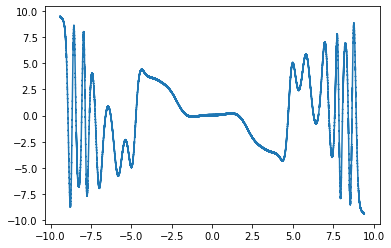

In [3]:
init = -4*np.pi
endval = 4*np.pi
step = .0001
x = np.arange(init,endval+step,step)
y = vf(x) + .1*np.random.rand(np.size(x))
plt.plot(x,y)

## Randomizing and divinding data into test and train sets

In [4]:
p = np.random.permutation(len(x)) # Create a random permutation 
x_perm = x[p]
y_perm = y[p] # Aplling same permutation on both

### Plotting to see if nothing changed (sceptical people go :D )

In [5]:
#plt.plot(x,y)
#plt.plot(x_perm,y_perm,',r')

### Train set and test set, train set is 80% of the data

In [6]:
x_train_full , x_test , y_train_full, y_test = x_perm[:int(np.floor(.8*len(x)))], x_perm[int(np.floor(.8*len(x))):], y_perm[:int(np.floor(.8*len(x)))], y_perm[int(np.floor(.8*len(x))):]

#### Since all the training data is mixed the plot is the same (except for the blank spots)

In [7]:
#plt.plot(x_train_full,y_train_full,',r')

In [8]:
#plt.plot(x_test,y_test,',b')

### Validation and training set

In [9]:
x_train, x_valid, y_train, y_valid = x_train_full[:int(np.floor(.8*len(x)))], x_train_full[int(np.floor(.8*len(x))):], y_train_full[:int(np.floor(.8*len(x)))], y_train_full[int(np.floor(.8*len(x))):]

# Making the DNN 

#### Using keras functional api to construct the the  problem
#### Unsing wide and deep neural net

In [10]:
input_ = keras.layers.Input(shape=(1,))
hidden_x = keras.layers.Dense(10, activation="tanh")(input_)
n_layers = 100
for layer in range(n_layers):
    hidden_x = keras.layers.Dense(20, activation="tanh")(hidden_x)
    #hidden_x = keras.layers.Dropout(rate=0.1)(hidden_x)
concat = keras.layers.Concatenate()([input_,hidden_x])
hidden_out_1 = keras.layers.Dense(21, activation="tanh")(concat)
hidden_out_2 = keras.layers.Dense(10, activation="tanh")(hidden_out_1)
output = keras.layers.Dense(1)(hidden_out_2)
model = keras.Model(inputs=[input_], outputs=[output])

## Compiling the DNN

In [11]:
model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.0005, beta_1=0.8, beta_2=0.99))

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           20          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           220         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           420         dense_1[0][0]                    
______________________________________________________________________________________________

## Fitting the DNN

In [13]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  print('Found GPU at: {}'.format(device_name))
  with tf.device(device_name):
    history = model.fit(x_train,y_train, epochs=30, validation_data=(x_valid,y_valid))
else:
  history = model.fit(x_train,y_train, epochs=200, validation_data=(x_valid,y_valid))

Epoch 1/30
4713/4713 [==============================] - 10s 2ms/step - loss: 24.6986
Epoch 2/30
4713/4713 [==============================] - 8s 2ms/step - loss: 11.0046
Epoch 3/30
4713/4713 [==============================] - 8s 2ms/step - loss: 10.3418
Epoch 4/30
4713/4713 [==============================] - 8s 2ms/step - loss: 9.9233
Epoch 5/30
4713/4713 [==============================] - 8s 2ms/step - loss: 9.6421
Epoch 6/30
4713/4713 [==============================] - 8s 2ms/step - loss: 10.1716
Epoch 7/30
4713/4713 [==============================] - 8s 2ms/step - loss: 11.8752
Epoch 8/30
1114/4713 [======>.......................] - ETA: 7s - loss: 11.6667

KeyboardInterrupt: 

In [14]:
mse_test = model.evaluate(x_test, y_test)

1179/1179 [==============================] - 1s 804us/step - loss: 10.8878


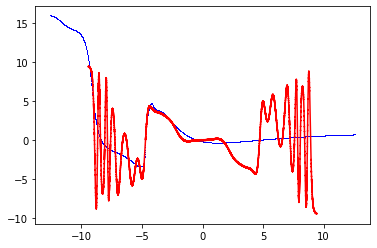

In [15]:
x_new = np.arange(-4*np.pi,4*np.pi+step*100,step*100)
y_new = model.predict(x_new)
plt.plot(x_new,y_new,',b')
plt.plot(x,y,'r')